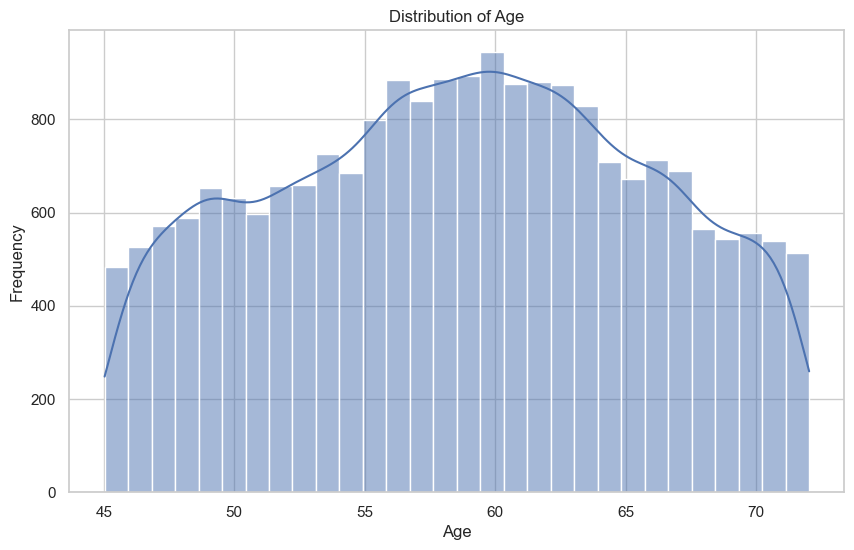

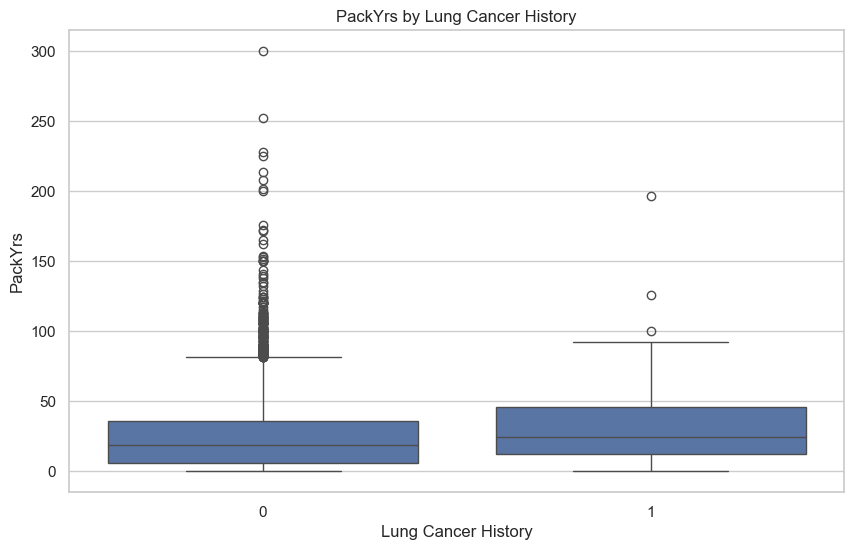

In [152]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('cleaned_UHS.xlsx')

sns.set_theme(style="whitegrid")

# distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# pack yrs vs lung cancer history 
plt.figure(figsize=(10, 6))
sns.boxplot(x='LungCancerHistory', y='PackYrs', data=df)
plt.title('PackYrs by Lung Cancer History')
plt.xlabel('Lung Cancer History')
plt.ylabel('PackYrs')
plt.show()




In [153]:
df = df.dropna()
df['Age'] = df['Age'].astype(int)

# standardize age, packyrs, quityrs
scaler = StandardScaler()
df[['Age', 'PackYrs', 'QuitYrs']] = scaler.fit_transform(df[['Age', 'PackYrs', 'QuitYrs']])

x = df.drop(['LungCancerHistory', 'Sex_Female', 'Ethnicity_Non-Hispanic', 'ZIP', 'TobaccoUse_Heavy Smoker', 'TobaccoUse_Former'], axis=1)
y = df['LungCancerHistory']

x.head()



,Age,PackYrs,QuitYrs,TobaccoUse_Every Day,TobaccoUse_Light Smoker,TobaccoUse_Some Days,Sex_Male,Race_Black or African American,Race_Other,Race_White,Ethnicity_Unknown,Latest_LDCT_Exists,Ethnicity_Hispanic
5,1.216260,-0.818611,0.250033,0,0,0,0,0,0,1,0,0,0
12,-1.946630,-0.195247,-1.168241,0,0,0,0,0,0,1,0,0,0
21,-1.802862,-0.403035,-0.631304,0,0,0,0,0,0,1,0,0,0
45,0.353654,0.930964,-1.071972,0,0,0,0,0,0,1,0,0,0
50,1.503796,0.116435,-0.608931,0,0,0,0,0,0,1,1,0,0


In [154]:
correlation_matrix = x.corr()

# correlation matrix
print(correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)])

                                Age  PackYrs  QuitYrs  TobaccoUse_Every Day  \
Age                             1.0      NaN      NaN                   NaN   
PackYrs                         NaN      1.0      NaN                   NaN   
QuitYrs                         NaN      NaN      1.0                   NaN   
TobaccoUse_Every Day            NaN      NaN      NaN                   1.0   
TobaccoUse_Light Smoker         NaN      NaN      NaN                   NaN   
TobaccoUse_Some Days            NaN      NaN      NaN                   NaN   
Sex_Male                        NaN      NaN      NaN                   NaN   
Race_Black or African American  NaN      NaN      NaN                   NaN   
Race_Other                      NaN      NaN      NaN                   NaN   
Race_White                      NaN      NaN      NaN                   NaN   
Ethnicity_Unknown               NaN      NaN      NaN                   NaN   
Latest_LDCT_Exists              NaN      NaN      Na

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif


,Variable,VIF
0,Age,1.166142
1,PackYrs,1.297235
2,QuitYrs,1.366551
3,TobaccoUse_Every Day,1.073496
4,TobaccoUse_Light Smoker,1.004468
5,TobaccoUse_Some Days,1.040327
6,Sex_Male,1.873450
7,Race_Black or African American,1.051546
8,Race_Other,1.281488
9,Race_White,1.952562


In [156]:
# add constant
x = sm.add_constant(x)

# fit
logit_model = sm.Logit(y, x)
result = logit_model.fit()

result.summary()


         Current function value: 0.068339
         Iterations: 35


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      LungCancerHistory   No. Observations:                 4501
Model:                          Logit   Df Residuals:                     4487
Method:                           MLE   Df Model:                           13
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                 0.08385
Time:                        12:31:02   Log-Likelihood:                -307.59
converged:                      False   LL-Null:                       -335.75
Covariance Type:            nonrobust   LLR p-value:                 2.379e-07
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -22.7238   1.06e+04     -0.002      0.998   -2.07e+04    2.07e+04
Age                                0.4266      0.139      3.070      0.002       0.154       0.699
PackYrs                            0.2071      0.097      2.132      0.033       0.017       0.397
QuitYrs                           -0.9760      0.189     -5.151      0.000      -1.347      -0.605
TobaccoUse_Every Day              -0.4433      0.736     -0.602      0.547      -1.886       1.000
TobaccoUse_Light Smoker          -24.0837   4.36e+05  -5.52e-05      1.000   -8.55e+05    8.55e+05
TobaccoUse_Some Days               0.2013      0.744      0.271      0.787      -1.256       1.659
Sex_Male                          -0.3810      0.265     -1.440      0.150      -0.899       0.137
Race_Black or African American    17.7092   1.06e+04      0.002      0.999   -2.07e+04    2.07e+04
Race_Other                        -4.6697   8.69e+04  -5.38e-05      1.000    -1.7e+05     1.7e+05
Race_White                        18.4282   1.06e+04      0.002      0.999   -2.07e+04    2.07e+04
Ethnicity_Unknown               -175.8896   1.79e+38  -9.85e-37      1.000    -3.5e+38     3.5e+38
Latest_LDCT_Exists                -1.1801      0.486     -2.427      0.015      -2.133      -0.227
Ethnicity_Hispanic                 0.6004      1.036      0.579      0.562      -1.431       2.632
==================================================================================================
"""